# Climate Change in Round Rock, Texas 
#### Matthew Woodland

## Introduction
Areas across the globe are facing the dangers of a changing climate (CITATION). From heightened extremes (CITATION), to worsened natural disasters (CITATION), climate change is exposing the vulnerability of communities everywhere. 

In this short exercise, I will explore the changing climate in my hometown, Round Rock, Texas. I will investigate changes in preciptation and temperature patterns from September 2000 to September 2025. 


## Climate History of Round Rock, TX
Round Rock is a medium-sized suburban development just north of Austin, Texas. It is named after a literal rock that is round...ish. *INSERT PICTURE HERE* 

Given its location in central Texas, summers are hot (often exceeding 100°F), humid, and usually dry. Droughts and heatwaves are common during this time. 

## Downloading Data
Data used for this project will be from the Global Historical Climatology Network–Daily (GHCN-Daily) dataset, curated by the National Centers for Environmental Information (NCEI). The NCEI’s GHCN-Daily dataset compiles daily climate observations from land-based stations worldwide, including airports, weather stations, and other observer-run sites. These stations measure variables such as temperature (standardized in degrees Fahrenheit; although it can be changed based on user preference), precipitation, snowfall, and snow depth. Data are updated frequently from ~30 different sources and then integrated and quality-checked by NCEI to ensure accuracy and consistency.


### Reference
Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeill, Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, Byron E.Gleason, and Tamara G. Houston (2012): Global Historical Climatology Network - Daily (GHCN-Daily), Version 3. NOAA National Climatic Data Center. doi:10.7289/V5D21VHZ. Retrieved September 29, 2025. 

In [2]:
# Loading in Packages
import pandas as pd
import earthpy as ep

In [3]:
# Accessing Data from NCEI
RR_url = ('https://www.ncei.noaa.gov/access/services/data'
'/v1?dataset=daily-summaries&dataTypes=TOBS,PRCP' #Temperature (TOBS) in Fahrenheit & Precipitation (PRCP) in inches
'&stations=USC00418862' #Taylor, TX station ID (USC00418862) b/c it's near (~15mi) & has supposedly 100% coverage from 2000-09-01 to 2025-09-27
'&startDate=2000-09-01&endDate=2025-09-27&units=standard') #Beginning of monitor deployment to present
RR_url

# Download the climate data
climate_RR_raw_df = pd.read_csv(
    RR_url,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN']
)

# Confirm download worked
climate_RR_raw_df.head()


,STATION,PRCP,TOBS
DATE,,,
2000-09-01,USC00418862,0.0,NaN
2000-09-02,USC00418862,0.0,NaN
2000-09-03,USC00418862,0.0,NaN
2000-09-04,USC00418862,0.0,NaN
2000-09-05,USC00418862,0.0,NaN


In [11]:
# Cleaning up dataframe
climate_RR_df = climate_RR_raw_df[['TOBS', 'PRCP']].rename( # keeping only temperature & precipitaion columns
    columns={'TOBS': 'temp_F', # renaming temperature column
             'PRCP': 'precip_in'} # renaming precipitation column
             )
climate_RR_df

,temp_F,precip_in
DATE,,
2000-09-01,NaN,0.0
2000-09-02,NaN,0.0
2000-09-03,NaN,0.0
2000-09-04,NaN,0.0
2000-09-05,NaN,0.0
...,...,...
2025-09-23,78.0,0.0
2025-09-24,80.0,0.0
2025-09-25,71.0,0.0


In [16]:
#change to Celsius? We'll keep it in Fahrenheit for now

# Convert precipitation from inches to milimeters
def convert_in_to_mm(precip_in):
    """Convert inches temperature to milimeters"""
    precip_mm = precip_in * 25.4
    return precip_mm # Put your equation in here

climate_RR_df['precip_mm'] = (
    climate_RR_df['precip_in'].apply(convert_in_to_mm))

climate_RR_df

,temp_F,precip_in,temp_C,precip_mm
DATE,,,,
2000-09-01,NaN,0.0,NaN,0.0
2000-09-02,NaN,0.0,NaN,0.0
2000-09-03,NaN,0.0,NaN,0.0
2000-09-04,NaN,0.0,NaN,0.0
2000-09-05,NaN,0.0,NaN,0.0
...,...,...,...,...
2025-09-23,78.0,0.0,25.555556,0.0
2025-09-24,80.0,0.0,26.666667,0.0
2025-09-25,71.0,0.0,21.666667,0.0


In [17]:
# Resampling to annual mean temperature
annual_climate_RR_df = (
    climate_RR_df
    .resample('YS') #YS = YearStart (Jan 01)
    .mean() #compute average within the year
)
annual_climate_RR_df

,temp_F,precip_in,temp_C,precip_mm
DATE,,,,
2000-01-01,NaN,0.184344,NaN,4.682344
2001-01-01,59.660131,0.135068,15.366739,3.430740
2002-01-01,58.857534,0.098137,14.920852,2.492679
2003-01-01,59.358904,0.061260,15.199391,1.556011
2004-01-01,59.945355,0.133716,15.525197,3.396383
2005-01-01,59.706849,0.075671,15.392694,1.922049
2006-01-01,60.065753,0.095041,15.592085,2.414044
2007-01-01,58.912329,0.125863,14.951294,3.196921
2008-01-01,58.349727,0.053060,14.638737,1.347727


<Axes: title={'center': 'Average Annual Temperature in Round Rock, TX (2001-2025)'}, xlabel='Year', ylabel='Temperature (F)'>

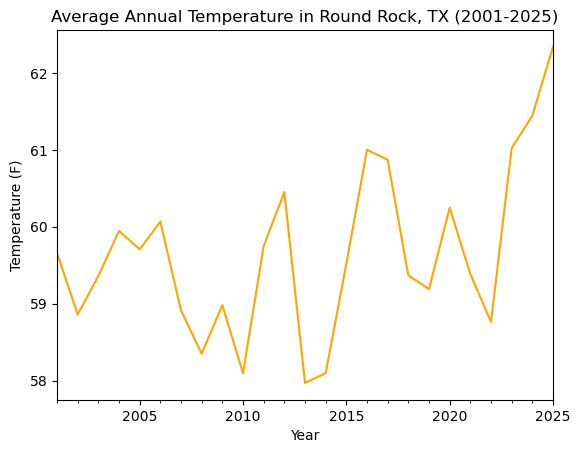

In [ ]:
# Plotting the Results
# ADD DESCRIPTIVE TITLE INTERPRETING THE PLOT
annual_climate_RR_df.plot(
    y='temp_F', #temp data to display
    title='Average Annual Temperature in Round Rock, TX (2001-2025)',
    xlabel='Year',
    ylabel='Temperature (F)',
    legend=False,
    color='orange', #color of data 
    xlim=('2001', '2025') #manually setting x limits (better formats the plot)
)

#CHECK FOR MISSING DATA IN THE PEAKS AND DIPS 